# Mini Project #1: Baseball Analytics

The overall purpose of this mini-project is to predicting MLB wins per season by modeling data to KMeans clustering model and linear regression models.

## Part 2: Further Data Handling

In this part, you are going to conduct further data handling tasks to prepare your data for the analysis. The data handling include, but not limited to: 
- __feature engineering__, 
- more __data visualization__, 
- more on __binning your continuous variables__, 
- __correlation analysis__ and __correlation based feature selection__.

Let's get started by importing the dependencies.

In [1]:
import pandas as pd

# We will need `numpy` in this part - so let's import it as well
import numpy as np
pd.options.display.max_columns = None

Now let's read the data we processed in Part1, and continue working on it.

In [2]:
df = pd.read_csv('../baseball_analytics_pt1.csv', header=0, index_col=0)

df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Win_bins
0,1961,LAA,162,70,744,5424,1331,218,22,189,681,1068.0,37,784,689,4.31,25,5,34,4314,1391,180,713,973,192,154.0,0.969,3
1,1962,LAA,162,86,718,5499,1377,232,35,137,602,917.0,46,706,603,3.70,23,15,47,4398,1412,118,616,858,175,153.0,0.972,3
2,1963,LAA,161,70,597,5506,1378,208,38,95,448,916.0,43,660,569,3.52,30,13,31,4365,1317,120,578,889,163,155.0,0.974,3
3,1964,LAA,162,82,544,5362,1297,186,27,102,472,920.0,49,551,469,2.91,30,28,41,4350,1273,100,530,965,138,168.0,0.978,3
4,1965,CAL,162,75,527,5354,1279,200,36,92,443,973.0,107,569,508,3.17,39,14,33,4323,1259,91,563,847,123,149.0,0.981,3


### Feature Engineering

Anyone who follows the game of baseball knows that, as Major League Baseball (MLB) progressed, different eras emerged where the amount of runs per game increased or decreased significantly. The dead ball era of the early 1900s is an example of a low scoring era and the steroid era at the turn of the 21st century is an example of a high scoring era. Hence, in this analysis, we want to exclude all the game data before the year `1900`.

In [3]:
#Filtering the years before year 1900

#### Complete your code below
#### You can filter by the value of a certain column `col` in a dataframe `df` as:
#### df[df[col] > some_value]
#### then you want to save the filtered results as a new dataframe `df`
df = df[df['yearID'] > 1990]
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Win_bins
29,1991,CAL,162,81,653,5470,1396,245,29,115,448,928.0,94,649,591,3.69,18,10,50,4323,1351,141,543,990,102,156.0,0.984,3
30,1992,CAL,162,72,579,5364,1306,202,20,88,416,882.0,160,671,617,3.84,26,13,42,4338,1449,130,532,888,134,172.0,0.979,3
31,1993,CAL,162,71,684,5391,1399,259,24,114,564,930.0,169,770,690,4.34,26,6,41,4290,1482,153,550,843,120,161.0,0.980,3
32,1996,CAL,161,70,762,5686,1571,256,24,192,527,974.0,53,943,849,5.31,12,8,38,4317,1546,219,662,1052,128,156.0,0.979,3
33,1997,ANA,162,84,829,5628,1531,279,25,161,617,953.0,126,794,730,4.52,9,5,39,4362,1506,202,605,1050,126,140.0,0.980,3


If you are into baseball, you will know Runs per Game (RPG) is an important factor in the game results (winning or not). Since we do not have that feature in the dataset, we are going to create that feaure from the features we have. In the dataset `df`, we have the runs (`df['R']`) and games (`df['G']`) features. We are going to use them to create RPG.

Firstly, we are doing the analysis on a yearly basis, so we need to aggregate the runs (`df['R']`) and games (`df['G']`) features to a yearly basis.

In [4]:
# Aggregate runs and games data to a yearly basis

#### complete the code below
#### Aggregation is a very important technique in dataframes
#### `pandas` provides a good method called `groupby()` for that
#### since we want to aggregate to a yearly basis, we are going to use the feature `yearID`
#### and combine the `groupby()` results with `sum()` we will get the aggregated results

#### create a new pandas series called `runs_per_year`, 
#### which is aggregating runs (`df['R']`) on a yearly basis
runs_per_year = df['R'].groupby(df['yearID']).sum()

#### do the same for games (`df['G']`)
games_per_year = df['G'].groupby(df['yearID']).sum()

#### We need to combine these two series into a dataframe ('rpg_df') to calculate RPG
#### We can do that by using the `pd.concat()` method provided by `pandas`
#### Since we want the two series are columns, we need to set the parameter `axis=1` in `concat()`
rpg_df = pd.concat([runs_per_year, games_per_year], axis=1)

#### Now we can calculate RPG: which is very simple: rpg = runs_per_year/games_per_year
rpg_df['RPG'] = rpg_df['R']/rpg_df['G']

#### let's double check the values of `rpg_df` by looking at its first 10 values
rpg_df.head(10)

,R,G,RPG
yearID,,,
1991,18127,4208,4.307747
1992,17341,4212,4.117047
1993,20864,4538,4.597620
1996,22831,4534,5.035509
1997,21604,4532,4.766990
1998,23297,4864,4.789679
1999,24691,4856,5.084638
2000,24971,4858,5.140181
2001,23199,4858,4.775422


### More on Data Visualization

Clearly, `rpg_df` is time series data - and in which the most important feature would be `rpg`. So we want to visulize it using line chart. `Matplotlib` has a useful method `plot()` for that purpose. We are going to use that for visualizing `rpg`.

First let's import `matplotlib`.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
# following statement set a large canvas for the visualization
plt.rcParams["figure.figsize"] = (20,10)

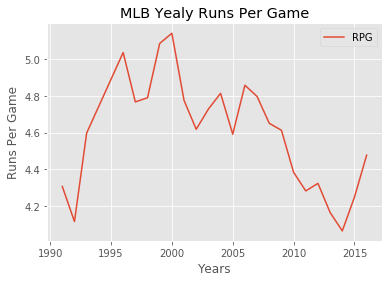

In [6]:

#### Complete the code below
#### use `plot()` method on `rpg_df`, and set y-axis as `rpg`.
#### the x-axis in this plot will be years, and you should notice that 
#### 'yearID' is the index of `rpg_df`
#### Instead of creating another column of `yearID` (which you can do),
#### you can simply tell `plot()` to use the index of the dataframe/series by
#### set the `use_index` parameter to `True`


#plt.plot(rpg_df['RPG']) #this doesn't like the "use_index" function so I removed it. It knows that I want the other axis to be the index's though
rpg_df.plot(y='RPG', use_index=True)

#### We want to set the title of the visualization as `MLB Yearly Runs Per Game`
plt.title("MLB Yealy Runs Per Game")

#### Set the y-axis as `Runs per Game` use `.xlabel()`
plt.ylabel('Runs Per Game')

#### The x-axis is year - so we set it as `Years`
plt.xlabel('Years')

#### show the plot
plt.show()

There is an alternative way of doing what we just did , which is shown as following.

In [7]:
# Creating the runs per year and games per year 

## Use Goupby and sum the count yearly
df.groupby("yearID").sum()

runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year=row['yearID']
    runs=row['R']
    games=row['G']
    if year in runs_per_year:
        runs_per_year[year]=runs_per_year[year]+ runs
        games_per_year[year]=games_per_year[year]+ games
    else:
        runs_per_year[year]=runs
        games_per_year[year]=games
        
## ADD notes to the print statement         
print('Runs_per_year', runs_per_year)
print(' Games_per_year', games_per_year)

Runs_per_year {1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744}
 Games_per_year {1991: 4208, 1992: 4212, 1993: 4538, 1996: 4534, 1997: 4532, 1998: 4864, 1999: 4856, 2000: 4858, 2001: 4858, 2002: 4852, 2003: 4860, 2004: 4856, 2005: 4862, 2006: 4858, 2007: 4862, 2008: 4856, 2009: 4860, 2010: 4860, 2011: 4858, 2012: 4860, 2013: 4862, 2014: 4860, 2015: 4858, 2016: 4856}


With these two dictionaries created, we can do the calculation using them.

In [8]:
# mlb runs per game (per year) dictionary 
runs_per_game = {}
for k,v in games_per_year.items():
    year = k 
    games = v
    runs = runs_per_year[year]
    runs_per_game[year]= runs/games
    
print(runs_per_game)

{1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353909465, 2004: 4.813838550247117, 2005: 4.591731797614151, 2006: 4.857760395224372, 2007: 4.7967914438502675, 2008: 4.650947281713345, 2009: 4.612962962962963, 2010: 4.3843621399176955, 2011: 4.283244133388226, 2012: 4.324485596707819, 2013: 4.1659810777457835, 2014: 4.0660493827160495, 2015: 4.250102923013586, 2016: 4.477759472817134}


__Note__: dictionaries would be a good alternative of `pandas` functions.

Now let's visualize `runs_per_game` again using the dictionaries.

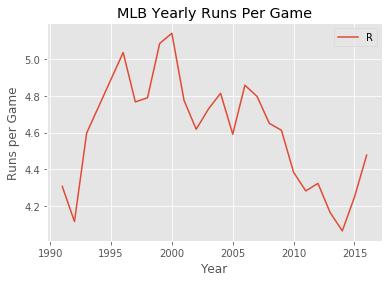

In [9]:
# Creating lists from mlb_runs_per_game
## List of tuples (x, y) 
lists = sorted(runs_per_game.items())
x,y = zip(*lists)

plt.plot(x,y)
plt.title("MLB Yearly Runs Per Game")
plt.xlabel("Year")
plt.ylabel("Runs per Game")
plt.legend('Runs_per_Game')
plt.show()

### More on Variable Binning

Remember in part 1 we binned wins (`df['W']`) to a categorical variable - that was for making the analysis a __classification__ problem. Sometimes we also using binning for __dimensionality reduction__ purposes. For instance, the feature year (`df['yearID']`) has more than 100 distinct values, so its dimensionality will be 100+. A lot of machine learning algorithms do not like high-dimensional features, so it is a common practice to __bin high-dimensional features__.

__Rule of thumb__: if a categorical feature has more than __5__ categories, you should consider bin it.

In the block below, you are going to create your own function (`assign_label`) and apply it to your data (`df`).

When a categorical variable is low-dimensional, we shoud create dummy variables for that. `pandas` provides a function called `get_dummies()` for that.

In [10]:
# define the `assign_label` function

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >= 1942 and year <= 1945:
        return 3
    elif year >= 1946 and year <= 1962:
        return 4
    elif year >= 1963 and year <= 1976:
        return 5
    elif year >= 1977 and year <= 1992:
        return 6
    elif year >= 1993 and year <= 2009:
        return 7
    elif year >= 2010:
        return 8

#### complete the code below
#### Add `year_label` column to `df`
#### by applying `assign_label` to the `df['yearID'] column
df['year_label'] = df['yearID'].apply(assign_label)

#### create dummy variables for `year_label`
#### call `pd.get_dummies` on `df['year_label']`
#### set the `prefix` parameter of `get_dummies` to `'era'`
#### store the results in a dataframe `dummy_df`
dummy_df=pd.get_dummies(df['year_label'], prefix='era')
#dummy_df=pd.get_dummies(df, columns=['year_label'], prefix='era')

#### Concatenate `df` and `dummy_df` using pd.concat()
df = pd.concat([df, dummy_df], axis=1)

#### Check whether the dummy variables are successfully created
df.head()

,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Win_bins,year_label,era_6,era_7,era_8
29,1991,CAL,162,81,653,5470,1396,245,29,115,448,928.0,94,649,591,3.69,18,10,50,4323,1351,141,543,990,102,156.0,0.984,3,6,1,0,0
30,1992,CAL,162,72,579,5364,1306,202,20,88,416,882.0,160,671,617,3.84,26,13,42,4338,1449,130,532,888,134,172.0,0.979,3,6,1,0,0
31,1993,CAL,162,71,684,5391,1399,259,24,114,564,930.0,169,770,690,4.34,26,6,41,4290,1482,153,550,843,120,161.0,0.980,3,7,0,1,0
32,1996,CAL,161,70,762,5686,1571,256,24,192,527,974.0,53,943,849,5.31,12,8,38,4317,1546,219,662,1052,128,156.0,0.979,3,7,0,1,0
33,1997,ANA,162,84,829,5628,1531,279,25,161,617,953.0,126,794,730,4.52,9,5,39,4362,1506,202,605,1050,126,140.0,0.980,3,7,0,1,0


We can add  *Runs per Game* data from the `runs_per_game` dictionary to `df`.

In [11]:
# Create column for  runs per game from the runs_per_game dictionary
def assign_rpg(year):
    return runs_per_game[year]

df['rpg'] = df['yearID'].apply(assign_rpg)
df['rpg'].head()

29    4.307747
30    4.117047
31    4.597620
32    5.035509
33    4.766990
Name: rpg, dtype: float64

An alternative way of binning the `yearID` feature is to bin it by **decade**, then create dummy variables based on **dacades**. This can be done using following code.

In [12]:
# Convert years into decade bins and creating dummy variables
def assign_decade(year):
    if year < 1920:
        return 1910
    elif year >= 1920 and year <= 1929:
        return 1920
    elif year >= 1930 and year <= 1939:
        return 1930
    elif year >= 1940 and year <= 1949:
        return 1940
    elif year >= 1950 and year <= 1959:
        return 1950
    elif year >= 1960 and year <= 1969:
        return 1960
    elif year >= 1970 and year <= 1979:
        return 1970
    elif year >= 1980 and year <= 1989:
        return 1980
    elif year >= 1990 and year <= 1999:
        return 1990
    elif year >= 2000 and year <= 2009:
        return 2000
    elif year >= 2010:
        return 2010
    
#### complete the code below
#### Add `decade_label` column to `df`
#### by applying `assign_decade` function to the `df['yearID'] column
df['decade_label'] = df['yearID'].apply(assign_decade)
df
#### create dummy variables for `year_label`
#### call `pd.get_dummies` on `df['year_label']`
#### set the `prefix` parameter of `get_dummies` to `'era'`
#### store the results in a dataframe `decade_df`
decade_df = pd.get_dummies(df['year_label'], prefix='decade')
decade_df
#### Concatenate `df` and `decade_df` using pd.concat()
df = pd.concat([df, decade_df], axis=1)
df.head()
#### Check if above actions are done properly
#### by looking at the first 5 rows of `df`


,yearID,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Win_bins,year_label,era_6,era_7,era_8,rpg,decade_label,decade_6,decade_7,decade_8
29,1991,CAL,162,81,653,5470,1396,245,29,115,448,928.0,94,649,591,3.69,18,10,50,4323,1351,141,543,990,102,156.0,0.984,3,6,1,0,0,4.307747,1990,1,0,0
30,1992,CAL,162,72,579,5364,1306,202,20,88,416,882.0,160,671,617,3.84,26,13,42,4338,1449,130,532,888,134,172.0,0.979,3,6,1,0,0,4.117047,1990,1,0,0
31,1993,CAL,162,71,684,5391,1399,259,24,114,564,930.0,169,770,690,4.34,26,6,41,4290,1482,153,550,843,120,161.0,0.980,3,7,0,1,0,4.597620,1990,0,1,0
32,1996,CAL,161,70,762,5686,1571,256,24,192,527,974.0,53,943,849,5.31,12,8,38,4317,1546,219,662,1052,128,156.0,0.979,3,7,0,1,0,5.035509,1990,0,1,0
33,1997,ANA,162,84,829,5628,1531,279,25,161,617,953.0,126,794,730,4.52,9,5,39,4362,1506,202,605,1050,126,140.0,0.980,3,7,0,1,0,4.766990,1990,0,1,0


The next step in __feature engineering__ is to remove all unwanted features, in this case, we used `yearID`, `year_level`, and `decade_level` to generate new dummy variables - thus we do not need them any more.

In [13]:
#### complete your code here
df = df.drop(columns = ['yearID', 'year_label', 'decade_label'])
df.head()

,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Win_bins,era_6,era_7,era_8,rpg,decade_6,decade_7,decade_8
29,CAL,162,81,653,5470,1396,245,29,115,448,928.0,94,649,591,3.69,18,10,50,4323,1351,141,543,990,102,156.0,0.984,3,1,0,0,4.307747,1,0,0
30,CAL,162,72,579,5364,1306,202,20,88,416,882.0,160,671,617,3.84,26,13,42,4338,1449,130,532,888,134,172.0,0.979,3,1,0,0,4.117047,1,0,0
31,CAL,162,71,684,5391,1399,259,24,114,564,930.0,169,770,690,4.34,26,6,41,4290,1482,153,550,843,120,161.0,0.980,3,0,1,0,4.597620,0,1,0
32,CAL,161,70,762,5686,1571,256,24,192,527,974.0,53,943,849,5.31,12,8,38,4317,1546,219,662,1052,128,156.0,0.979,3,0,1,0,5.035509,0,1,0
33,ANA,162,84,829,5628,1531,279,25,161,617,953.0,126,794,730,4.52,9,5,39,4362,1506,202,605,1050,126,140.0,0.980,3,0,1,0,4.766990,0,1,0


_Runs per Game_ and _Runs Allowed per Game_ (at __game__ level, not aggregated) are important features in the baseball domain. Now let us go ahead and create them.

In [14]:
#### Complete your code below
#### runs per game = # of runs/# of games
#### # of runs is in `df['R']`
#### # of games is in `df['G']`
df['R_per_game'] = df['R']/df['G']
df.head()
#### runs allowed per game = # of runs allowed/# of games
#### # of runs allowed is in `df['RA']
df['RA_per_game'] = df['RA']/df['G']
df.head()

#### double check whether our calculations are successful or not
#### by looking at the first 10 columns of `df`
df.head(10)

,teamID,G,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,Win_bins,era_6,era_7,era_8,rpg,decade_6,decade_7,decade_8,R_per_game,RA_per_game
29,CAL,162,81,653,5470,1396,245,29,115,448,928.0,94,649,591,3.69,18,10,50,4323,1351,141,543,990,102,156.0,0.984,3,1,0,0,4.307747,1,0,0,4.030864,4.006173
30,CAL,162,72,579,5364,1306,202,20,88,416,882.0,160,671,617,3.84,26,13,42,4338,1449,130,532,888,134,172.0,0.979,3,1,0,0,4.117047,1,0,0,3.574074,4.141975
31,CAL,162,71,684,5391,1399,259,24,114,564,930.0,169,770,690,4.34,26,6,41,4290,1482,153,550,843,120,161.0,0.980,3,0,1,0,4.597620,0,1,0,4.222222,4.753086
32,CAL,161,70,762,5686,1571,256,24,192,527,974.0,53,943,849,5.31,12,8,38,4317,1546,219,662,1052,128,156.0,0.979,3,0,1,0,5.035509,0,1,0,4.732919,5.857143
33,ANA,162,84,829,5628,1531,279,25,161,617,953.0,126,794,730,4.52,9,5,39,4362,1506,202,605,1050,126,140.0,0.980,3,0,1,0,4.766990,0,1,0,5.117284,4.901235
34,ANA,162,85,787,5630,1530,314,27,147,510,1028.0,93,783,720,4.49,3,5,52,4332,1481,164,630,1091,106,146.0,0.983,3,0,1,0,4.789679,0,1,0,4.858025,4.833333
35,ANA,162,70,711,5494,1404,248,22,158,511,1022.0,71,826,762,4.79,4,7,37,4293,1472,177,624,877,106,156.0,0.983,3,0,1,0,5.084638,0,1,0,4.388889,5.098765
36,ANA,162,82,864,5628,1574,309,34,236,608,1024.0,93,869,805,5.00,5,3,46,4344,1534,228,662,846,134,182.0,0.978,3,0,1,0,5.140181,0,1,0,5.333333,5.364198
37,ANA,162,75,691,5551,1447,275,26,158,494,1001.0,116,730,671,4.20,6,1,43,4313,1452,168,525,947,103,142.0,0.983,3,0,1,0,4.775422,0,1,0,4.265432,4.506173
38,ANA,162,99,851,5678,1603,333,32,152,462,805.0,117,644,595,3.69,7,14,54,4357,1345,169,509,999,87,151.0,0.986,4,0,1,0,4.618302,0,1,0,5.253086,3.975309


In [15]:
df.RA_per_game.describe()

count    706.000000
mean       4.595826
std        0.566172
min        3.240741
25%        4.179012
50%        4.575400
75%        4.987635
max        6.808642
Name: RA_per_game, dtype: float64

### Correlation Analysis

Correlation analysis is an important topic in data analysis, which is also a basis of feature engineering. You want to select features that are __highly__ correlated with your target variable. 

__Note__: in the meanwhile, if you are using linear models, such as linear regression, decision tree, or naive Bayes, you do not want more than __one__ features are __highly__ correlated.

Correlation analysis can be done in several ways: one of the most direct is using the `corr()` method provided in `pandas`. In this part, we are going to calulate the correlation between a particular feature and the target using `numpy`, and then visualize the correlation trends.

In above analysis, we believe that **Runs per Game** and **Runs Allowed per Game** are two important features in predicting our target (`win`). We are going to visualize the correlation between each of them and `win` to prove that.

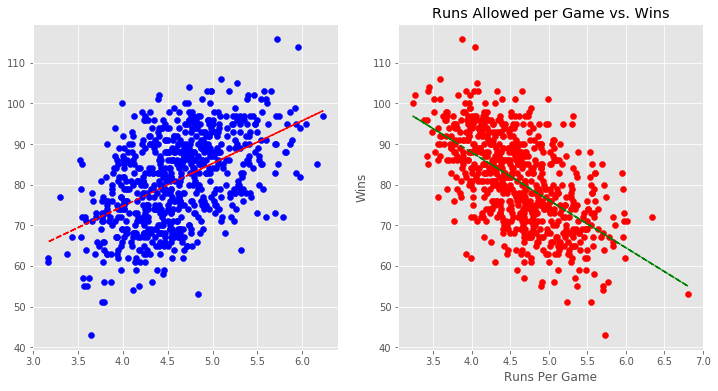

In [25]:
# create a variable called `fig` which contains the size of a figure
fig = plt.figure(figsize=(12, 6))

# create two sub-figures, one for `runs per game`, one for `runs allowed per game`
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# define the axis we use in the figure
x1 = df['R_per_game']
x2 = df['RA_per_game']
y = df['W']

#### Complete your code here
#### We are using scatterplot to visualize the correlation trend - which is the common practice
#### if you don't remember how to create a scatterplot, please refer to part 1
#### in the 1st sub-figure (`ax1`), we define the x-axis as 'Runs per Game'
#### and y-axis as 'Wins', and color as 'blue'

ax1.scatter(x=x1, y=y, c= 'blue')

#### You will also add title as 'Runs per Game vs. Wins'
#### and then add proper axis names to it
plt.title('Runs per Game vs. Wins')
plt.xlabel('Runs Per Game')
plt.ylabel('Wins')



# To better visualize the correlation trend, we are going to add trend line to it
# Following snippet add trend line of correlation to `ax1`

z = np.polyfit(x1, y, 1)
p = np.poly1d(z)
ax1.plot(x1,p(x1),"r--")

#### complete your code here
#### similarly, we are going to visualize the correlation between `runs allowed per game`
#### and `Wins` in `ax2`, we set the color to 'red'
ax2.scatter(x=x2, y=y, c= 'red')

#### You will also add title as 'Runs per Game vs. Wins'
#### and then add proper axis names to it
plt.title('Runs Allowed per Game vs. Wins')
plt.xlabel('Runs Per Game')

#### You will also add title as 'Runs Allowed per Game vs. Wins'

#### you will then add x-axis label to `ax2` - note that you do not need 
#### to add y-axis label since it is shared with `ax1`


# We will use the similar code as above to add trend line in `ax2`
z1 = np.polyfit(x2, y, 1)
p1 = np.poly1d(z1)
ax2.plot(x2,p1(x2),"g--")

#### show the plot
plt.show()

Can you observe the different correlation trends in above visualization?

To see how each of the variables is correlated with the target variable, we will use the `corr()` method provided by `Pandas`.

In [26]:
#### complete your code below
#### check if features are highly correlated with Wins(`df['W']`) (>.5)

#_______________________________
## these linse of code will only diplay the correlation for the R/RA columns
corr_rpg = df['R_per_game'].corr(df['W']) > 0.5
print(corr_rpg)

corr_rapg = df['RA_per_game'].corr(df['W']) > 0.5
print(corr_rapg)

#______________________________
# df.corr() # not sure if you want then entire df displayed or not, if so use this line of code

True
False


You can observe some features are __highly__ correlated with Wins.

However, that is not the whole picture - for instance, `RA_per_game` is not highly correlated with Wins. In fact, a feature can be __highly__ and __negatively__ correlated with your target.

So the correct code should reflect that.

In [27]:
#### complete your code below
#### check if features are highly correlated with Wins(`df['W']`) (>.5 or <-.5)
corr_rpg = (df['R_per_game'].corr(df['W']) > 0.5) or (df['R_per_game'].corr(df['W']) < -0.5)
print(corr_rpg)

corr_rapg = (df['RA_per_game'].corr(df['W']) > 0.5) or (df['RA_per_game'].corr(df['W']) < -0.5)
print(corr_rapg)


True
True


Now you can observe a few more are __highly__ correlated with Wins, such as `RA_per_game`.

Above code is equivalent to:

In [28]:
s1 = df.corr()['W'] > 0.5 
s2 = df.corr()['W'] < -0.5
s1 | s2 # logical OR

G              False
W               True
R               True
AB             False
H              False
2B             False
3B             False
HR             False
BB             False
SO             False
SB             False
RA              True
ER              True
ERA             True
CG             False
SHO            False
SV              True
IPouts         False
HA             False
HRA            False
BBA            False
SOA            False
E              False
DP             False
FP             False
Win_bins        True
era_6          False
era_7          False
era_8          False
rpg            False
decade_6       False
decade_7       False
decade_8       False
R_per_game      True
RA_per_game     True
Name: W, dtype: bool

Now we can create a new dataframe `data_features` that only contains useful features (excluding the target and unwanted features).

In [29]:
#Creating a new dataframe excluding the target variable 
'''
attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
             'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','decade_1910','decade_1920',
              'decade_1930','decade_1940','decade_1950','decade_1960','decade_1970','decade_1980',
              'decade_1990','decade_2000','decade_2010','R_per_game','RA_per_game','rpg']

data_features = df[attributes]

# check the first 5 rows of `data_features`
data_features.head()
'''
###_____________________________________________________________________________________________________
## had to change this because my dummy variable columns got messed up and never appeared as the format in the list. (decade_1910) style format didnt work



#Creating a new dataframe excluding the target variable 

attributes = ['G','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG',
             'SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','era_6','era_7',
              'era_8','R_per_game','RA_per_game','rpg', 'decade_6', 'decade_7', 'decade_8']

data_features = df[attributes]

# check the first 5 rows of `data_features`
data_features.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,IPouts,HA,HRA,BBA,SOA,E,DP,FP,era_6,era_7,era_8,R_per_game,RA_per_game,rpg,decade_6,decade_7,decade_8
29,162,653,5470,1396,245,29,115,448,928.0,94,649,591,3.69,18,10,50,4323,1351,141,543,990,102,156.0,0.984,1,0,0,4.030864,4.006173,4.307747,1,0,0
30,162,579,5364,1306,202,20,88,416,882.0,160,671,617,3.84,26,13,42,4338,1449,130,532,888,134,172.0,0.979,1,0,0,3.574074,4.141975,4.117047,1,0,0
31,162,684,5391,1399,259,24,114,564,930.0,169,770,690,4.34,26,6,41,4290,1482,153,550,843,120,161.0,0.980,0,1,0,4.222222,4.753086,4.597620,0,1,0
32,161,762,5686,1571,256,24,192,527,974.0,53,943,849,5.31,12,8,38,4317,1546,219,662,1052,128,156.0,0.979,0,1,0,4.732919,5.857143,5.035509,0,1,0
33,162,829,5628,1531,279,25,161,617,953.0,126,794,730,4.52,9,5,39,4362,1506,202,605,1050,126,140.0,0.980,0,1,0,5.117284,4.901235,4.766990,0,1,0


We can use following code to determine what columns are excluded in `data_features`.

In [30]:
set(df.columns) - set(data_features.columns)

{'W', 'Win_bins', 'teamID'}

I believe we complete the data preparation phase of the analysis.

Let's save the processed data to CSV files so that we can re-use it in part 3.

In [31]:
# save all features to a CSV file `baseball_analytics_features.csv`
data_features.to_csv('../data/baseball_analytics_features.csv')

# don't forget to save the target variable to another CSV file `baseball_analytics_target.csv`
df.Win_bins.to_csv('../data/baseball_analytics_target.csv')

# we also want to save the # of wins in the original data for further analysis
df.W.to_csv('../data/baseball_analytics_wins.csv')

That's all for part 2. Please make sure your sync the complete notebook to your github repo for submission.

## Completed Part 2